In [4]:
!pip install pandas seaborn matplotlib numpy scikit-learn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-darkgrid')
sns.set_palette("husl")

# 1. CARREGAMENTO DOS DADOS
# Dataset: IBM HR Analytics Employee Attrition & Performance
# Você pode baixar de: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

# Para este exemplo, vou criar um dataset sintético similar (ter a aleatoriedade)
np.random.seed(42)

# Criando dataset sintético para demonstração
n_samples = 1470

data = {
    'Age': np.random.randint(18, 65, n_samples),
    'Attrition': np.random.choice(['Yes', 'No'], n_samples, p=[0.16, 0.84]),
    'BusinessTravel': np.random.choice(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], n_samples),
    'DailyRate': np.random.randint(100, 1500, n_samples),
    'Department': np.random.choice(['Sales', 'Research & Development', 'Human Resources'], n_samples),
    'DistanceFromHome': np.random.randint(1, 30, n_samples),
    'Education': np.random.randint(1, 5, n_samples),
    'EducationField': np.random.choice(['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources'], n_samples),
    'EmployeeCount': np.ones(n_samples, dtype=int),
    'EmployeeNumber': np.arange(1, n_samples + 1),
    'EnvironmentSatisfaction': np.random.randint(1, 5, n_samples),
    'Gender': np.random.choice(['Female', 'Male'], n_samples),
    'HourlyRate': np.random.randint(30, 100, n_samples),
    'JobInvolvement': np.random.randint(1, 5, n_samples),
    'JobLevel': np.random.randint(1, 6, n_samples),
    'JobRole': np.random.choice(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
                                'Manufacturing Director', 'Healthcare Representative', 'Manager',
                                'Sales Representative', 'Research Director', 'Human Resources'], n_samples),
    'JobSatisfaction': np.random.randint(1, 5, n_samples),
    'MaritalStatus': np.random.choice(['Single', 'Married', 'Divorced'], n_samples),
    'MonthlyIncome': np.random.randint(1000, 20000, n_samples),
    'MonthlyRate': np.random.randint(2000, 27000, n_samples),
    'NumCompaniesWorked': np.random.randint(0, 10, n_samples),
    'Over18': ['Y'] * n_samples,
    'OverTime': np.random.choice(['Yes', 'No'], n_samples, p=[0.28, 0.72]),
    'PercentSalaryHike': np.random.randint(11, 26, n_samples),
    'PerformanceRating': np.random.choice([3, 4], n_samples, p=[0.84, 0.16]),
    'RelationshipSatisfaction': np.random.randint(1, 5, n_samples),
    'StandardHours': [80] * n_samples,
    'StockOptionLevel': np.random.randint(0, 4, n_samples),
    'TotalWorkingYears': np.random.randint(0, 40, n_samples),
    'TrainingTimesLastYear': np.random.randint(0, 7, n_samples),
    'WorkLifeBalance': np.random.randint(1, 5, n_samples),
    'YearsAtCompany': np.random.randint(0, 40, n_samples),
    'YearsInCurrentRole': np.random.randint(0, 19, n_samples),
    'YearsSinceLastPromotion': np.random.randint(0, 16, n_samples),
    'YearsWithCurrManager': np.random.randint(0, 18, n_samples)
}

df = pd.DataFrame(data)

# Ajustando algumas relações lógicas
df.loc[df['YearsAtCompany'] < df['YearsInCurrentRole'], 'YearsInCurrentRole'] = df['YearsAtCompany']
df.loc[df['YearsAtCompany'] < df['YearsSinceLastPromotion'], 'YearsSinceLastPromotion'] = df['YearsAtCompany']
df.loc[df['TotalWorkingYears'] < df['YearsAtCompany'], 'TotalWorkingYears'] = df['YearsAtCompany']

print("Dataset carregado com sucesso!")
print(f"Dimensões: {df.shape}")
print(f"Colunas: {df.columns.tolist()}")

Dataset carregado com sucesso!
Dimensões: (1470, 35)
Colunas: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [9]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,56,No,Travel_Frequently,1100,Human Resources,29,1,Marketing,1,1,...,3,80,1,13,4,3,13,10,12,9
1,46,No,Non-Travel,1305,Human Resources,8,3,Human Resources,1,2,...,1,80,2,39,5,4,22,7,0,6
2,32,No,Travel_Rarely,557,Human Resources,5,3,Technical Degree,1,3,...,1,80,0,27,2,1,22,5,13,0
3,60,No,Travel_Frequently,1017,Sales,17,4,Medical,1,4,...,3,80,2,16,2,2,16,10,0,1
4,25,No,Non-Travel,932,Sales,20,2,Other,1,5,...,3,80,2,32,4,4,12,12,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,38,No,Non-Travel,373,Research & Development,14,2,Life Sciences,1,1466,...,2,80,3,6,1,3,6,4,6,8
1466,39,No,Travel_Rarely,1055,Research & Development,8,1,Human Resources,1,1467,...,4,80,3,37,6,1,23,11,8,14
1467,24,No,Non-Travel,699,Sales,10,4,Technical Degree,1,1468,...,2,80,2,30,1,2,4,2,1,4
1468,31,No,Non-Travel,480,Human Resources,9,3,Medical,1,1469,...,3,80,3,25,2,3,25,8,14,12


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int32 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int32 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int32 
 6   Education                 1470 non-null   int32 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int32 
 9   EmployeeNumber            1470 non-null   int32 
 10  EnvironmentSatisfaction   1470 non-null   int32 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int32 
 13  JobInvolvement            1470 non-null   int32 
 14  JobLevel                

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,41.208163,13.492208,18.0,29.00,42.0,53.00,64.0
DailyRate,1470.0,810.546939,405.791543,100.0,465.00,819.5,1166.00,1499.0
DistanceFromHome,1470.0,14.931293,8.421101,1.0,7.25,15.0,22.00,29.0
Education,1470.0,2.465306,1.122737,1.0,1.00,2.0,3.00,4.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,735.500000,424.496761,1.0,368.25,735.5,1102.75,1470.0
EnvironmentSatisfaction,1470.0,2.519048,1.132167,1.0,1.00,3.0,4.00,4.0
HourlyRate,1470.0,64.546259,19.674035,30.0,48.00,65.0,81.00,99.0
JobInvolvement,1470.0,2.532653,1.098279,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,3.002721,1.433811,1.0,2.00,3.0,4.00,5.0


In [21]:
#Analise da variavel alvo (target)
#Attrition: Uma métrica que mede o número de funcionários que uma empresa perde ao longo do tempo.
#Tipos de Target: Classificação(Sim ou Não) ou Regressão(Série de Valores)
print("\n ====Distribuição da Variavel Alvo (Attrition)====")
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)
print(f"\nTaxa de Attrition: {(attrition_counts['Yes'] / len(df)) * 100:.2f}%")


 ====Distribuição da Variavel Alvo (Attrition)====
No     1224
Yes     246
Name: Attrition, dtype: int64

Taxa de Attrition: 16.73%


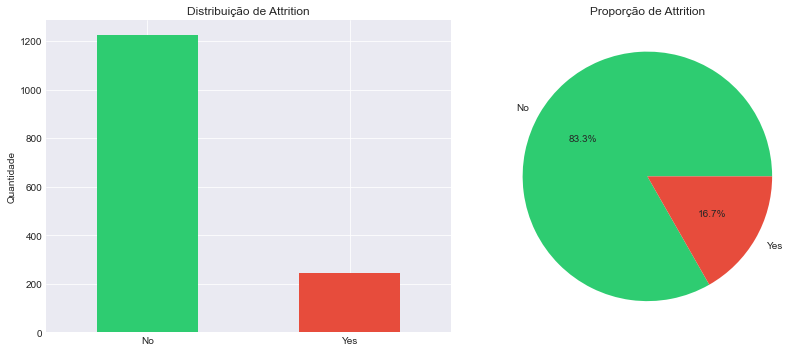


=== ANÁLISE DE VALORES AUSENTES ===
Não há valores ausentes no dataset!

=== VARIÁVEIS NUMÉRICAS (26) ===
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


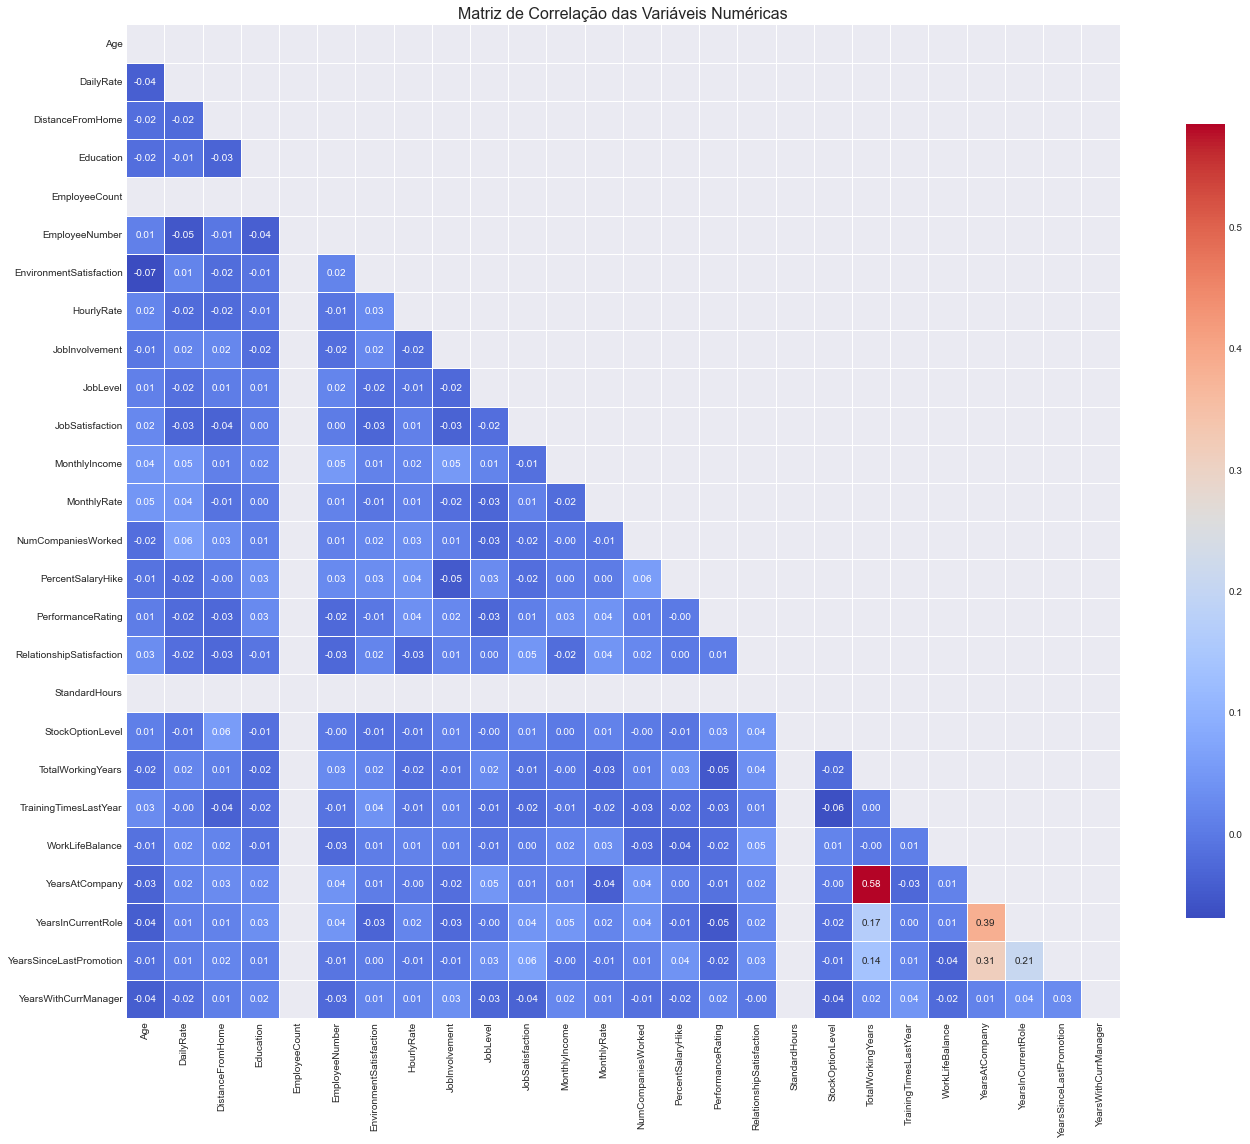


=== VARIÁVEIS CATEGÓRICAS (9) ===
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


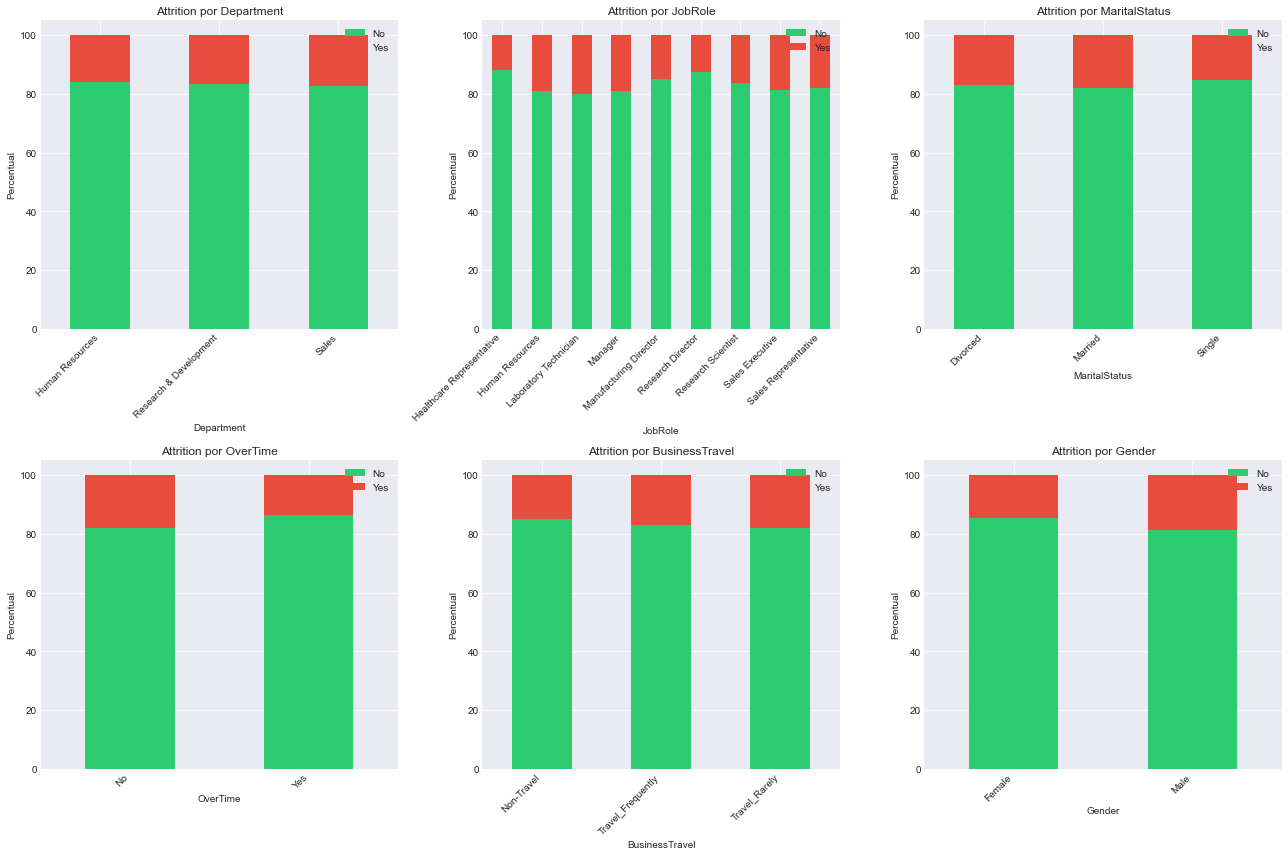

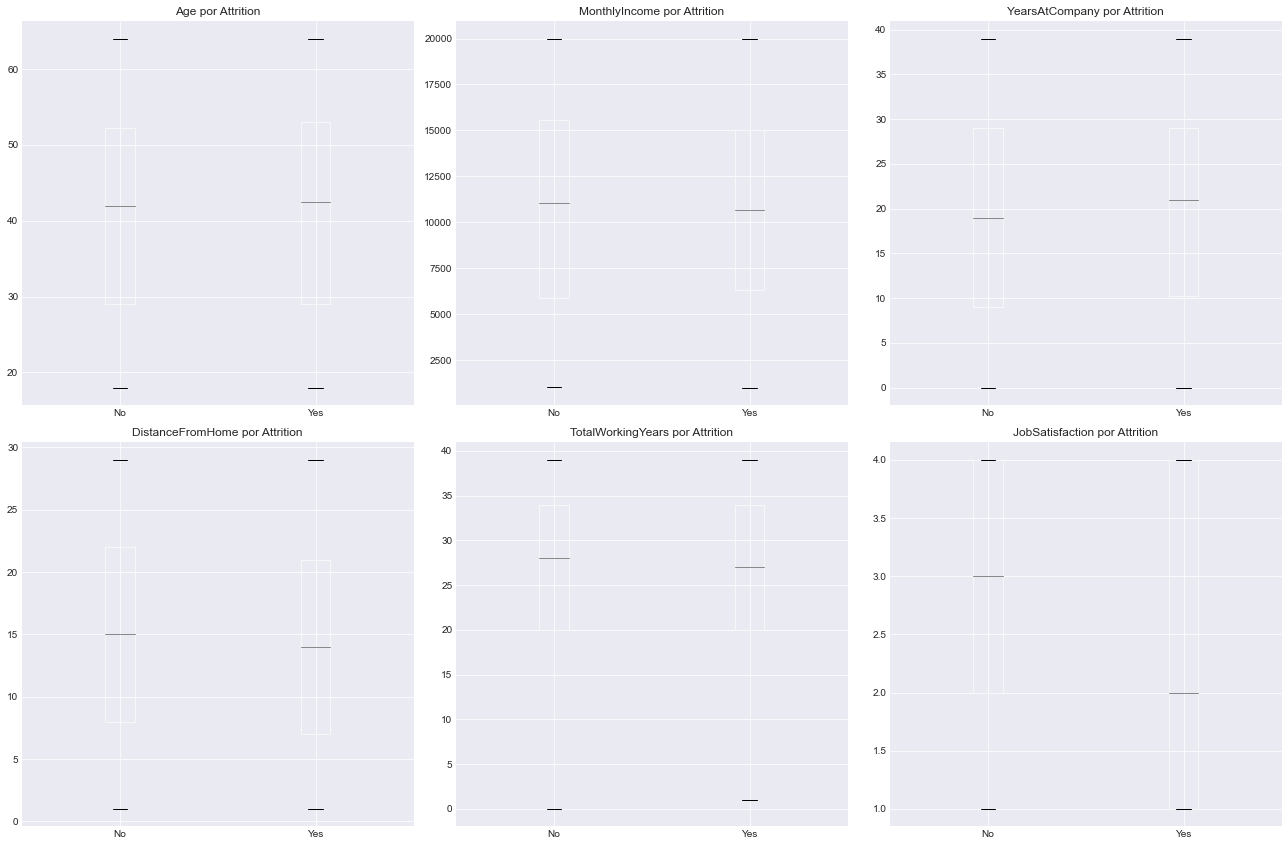

In [26]:


# Visualização da distribuição
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras
attrition_counts.plot(kind='bar', ax=ax[0], color=['#2ecc71', '#e74c3c'])
ax[0].set_title('Distribuição de Attrition')
ax[0].set_ylabel('Quantidade')
ax[0].set_xticklabels(['No', 'Yes'], rotation=0)

# Gráfico de pizza
attrition_counts.plot(kind='pie', ax=ax[1], autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
ax[1].set_title('Proporção de Attrition')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

# 2.3 Análise de missing values
print("\n=== ANÁLISE DE VALORES AUSENTES ===")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("Não há valores ausentes no dataset!")
else:
    print(missing_values[missing_values > 0])

# 2.4 Análise de variáveis numéricas
numeric_cols = df.select_dtypes(include=['int32', 'float32', 'int64']).columns
print(f"\n=== VARIÁVEIS NUMÉRICAS ({len(numeric_cols)}) ===")
print(numeric_cols.tolist())

# Matriz de correlação
plt.figure(figsize=(20, 16))
correlation_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

# 2.5 Análise de variáveis categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\n=== VARIÁVEIS CATEGÓRICAS ({len(categorical_cols)}) ===")
print(categorical_cols.tolist())

# Análise de attrition por variáveis categóricas importantes
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

important_cats = ['Department', 'JobRole', 'MaritalStatus', 'OverTime', 'BusinessTravel', 'Gender']

for idx, col in enumerate(important_cats):
    crosstab = pd.crosstab(df[col], df['Attrition'])
    crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

    crosstab_pct.plot(kind='bar', ax=axes[idx], stacked=True, color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'Attrition por {col}')
    axes[idx].set_ylabel('Percentual')
    axes[idx].legend(['No', 'Yes'], loc='upper right')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 2.6 Análise de distribuições numéricas por Attrition
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

important_nums = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome',
                  'TotalWorkingYears', 'JobSatisfaction']

for idx, col in enumerate(important_nums):
    df.boxplot(column=col, by='Attrition', ax=axes[idx])
    axes[idx].set_title(f'{col} por Attrition')
    axes[idx].set_xlabel('')

plt.suptitle('')
plt.tight_layout()
plt.show()